In [1]:
import numpy as np
import colormatch
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:

def _loadcie():
    wvl,xx,yy,zz = np.loadtxt("cmf.csv",unpack=True,delimiter=',')
    return wvl,xx,yy,zz

In [3]:

def xyz2rgb(x,y,normalization):
    
    z = 1-(x+y)
    
    r = np.sum(widegamut[0,:]*x)*normalization
    g = np.sum(widegamut[1,:]*y)*normalization
    b = np.sum(widegamut[2,:]*z)*normalization
    cmax = np.amax((r,g,b))
    
    #return r/cmax,g/cmax,b/cmax
    return r,g,b


In [4]:
def makexyz(wvl,spec):
    if np.amin(wvl)<1.0e-3: #probably meters not nanometers
        wvl*=1.0e9
    w0,xx,yy,zz = _loadcie()
    imin = np.where(wvl>np.amin(w0))[0][0]
    imax = np.where(wvl<np.amax(w0))[0][-1]
    wn = wvl[imin:imax+1]
    specn = spec[imin:imax+1]
    fx = interpolate.interp1d(w0,xx)
    fy = interpolate.interp1d(w0,yy)
    fz = interpolate.interp1d(w0,zz)
    
    xn = fx(wn)
    yn = fy(wn)
    zn = fz(wn)
    
    plt.plot(wn,xn)
    plt.plot(wn,yn)
    plt.plot(wn,zn)
    
    XI = np.trapz(xn*specn,x=wn)
    YI = np.trapz(yn*specn,x=wn)
    ZI = np.trapz(zn*specn,x=wn)
    #if (XI+YI+ZI)>0:
    #    xnu = XI/(XI+YI+ZI)
    #    ynu = YI/(XI+YI+ZI)
    #    znu = 1.0-(xnu+ynu)
    #else:
    #    xnu=0
    #    ynu=0
    #    znu=0
    
    return XI,YI,ZI

In [5]:
h = 6.62607004e-34
c = 2.99792458e8
kb = 1.38064852e-23

In [6]:
def blackbody(temp):
    wv = np.logspace(-8,-4,num=1000)
    planck = 2*h*c**2/wv**5 * 1.0/(np.exp(h*c/(wv*kb*temp))-1)
    return wv,planck

In [7]:
w,gstar = blackbody(5700.0)

(1e-15, 100000000000000.0)

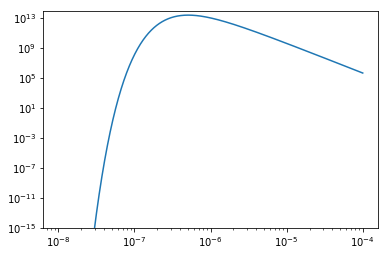

In [8]:
plt.plot(w,gstar)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0e-15,1.0e14)

In [9]:
w,mstar = blackbody(3000.0)

In [10]:
w,bstar = blackbody(8000.0)

(3.9e-07, 8.3e-07)

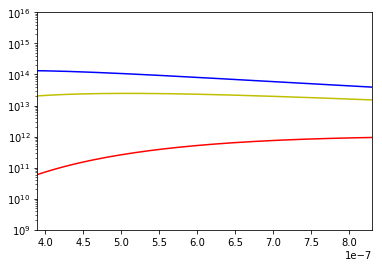

In [11]:
plt.plot(w,mstar,color='r')
plt.plot(w,gstar,color='y')
plt.plot(w,bstar,color='b')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0e9,1.0e16)
plt.xlim(3.90e-7,8.30e-7)

In [12]:
r1,g1,b1 = colormatch.spec2rgb(w,mstar,normalization=1.2)
r2,g2,b2 = colormatch.spec2rgb(w,gstar,normalization=1.2)
r3,g3,b3 = colormatch.spec2rgb(w,bstar,normalization=1.2)

0.5327352032341939 0.4790831058715296 0.22960519571719476
0.39653144820227 0.4025137278282032 0.4904779779619034
0.355337547676846 0.36564788566128725 0.5863049732123579


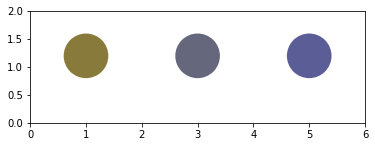

In [13]:

print r1,g1,b1
print r2,g2,b2
print r3,g3,b3
fig, ax = plt.subplots()
from matplotlib.patches import Circle
circle1 = Circle(xy=(1, 1*1.2), radius=0.4, fc=(r1,g1,b1))
circle2 = Circle(xy=(3, 1*1.2), radius=0.4, fc=(r2,g2,b2))
circle3 = Circle(xy=(5, 1*1.2), radius=0.4, fc=(r3,g3,b3))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
#ax.annotate('{:4d} K'.format(T), xy=(x, y*1.2-0.5), va='center',
            #ha='center', color=(r1,g1,b1))

# Set the limits and background colour; remove the ticks
ax.set_xlim(0,6)
ax.set_ylim(0,2)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_axis_bgcolor('k')
# Make sure our circles are circular!
ax.set_aspect("equal")

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if __name__ == '__main__':


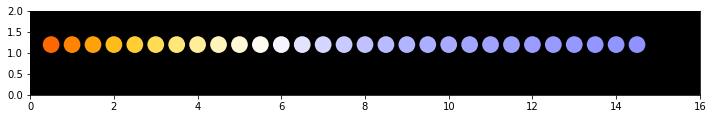

In [14]:
fig,ax = plt.subplots(figsize=(12,4))
for t in range(500,15000,500):
    w,s = blackbody(t)
    r,g,b = colormatch.spec2rgb(w,s*w,normalization=1.0)
    cmax = np.amax((r,g,b))
    ax.add_patch(Circle(xy=((t)/1000.0,1.2),radius=0.2,fc=(r/cmax,g/cmax,b/cmax)))
ax.set_xlim(0,16)
ax.set_ylim(0,2)
ax.set_axis_bgcolor('k')
ax.set_aspect("equal")

In [15]:
import netCDF4 as nc

In [16]:
planet = nc.Dataset("lmdz_c1.0mspec_phasecurve.nc","r")
planetnc =nc.Dataset("lmdz_c1.0mspecnc_phasecurve.nc","r")
gsol = nc.Dataset("lmdz_c1.0gspec_phasecurve.nc","r")
gsolnc = nc.Dataset("lmdz_c1.0gspecnc_phasecurve.nc","r")

In [17]:
for k in gsol.variables:
    print k, gsol.variables[k].shape,gsol.variables[k].dimensions

phase (64,) (u'phi',)
wvl (1445,) (u'wavelength',)
spectra (64, 1445) (u'phi', u'wavelength')
map (64, 47, 64, 1445) (u'phi', u'latitude', u'longitude', u'wavelength')


In [18]:
mm = gsol.variables['map'][32,:,:,:]
intens = np.zeros((47,64,3))
colors = np.zeros((47,64,3))

wvl = gsol.variables['wvl'][:]*1000.0

In [19]:
wvl[0]

340.00015

In [20]:
clors=plt.cm.plasma(np.linspace(0,1,num=32))

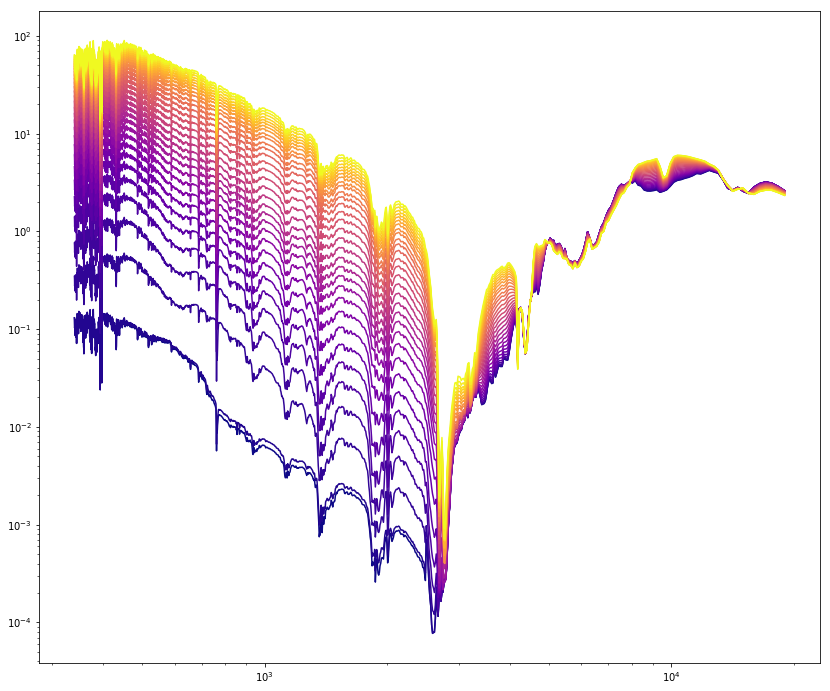

In [21]:
f,a=plt.subplots(figsize=(14,12))
for p in range(0,32):
    plt.plot(wvl,gsol.variables['spectra'][p,:],color=clors[p])
plt.xscale('log')
plt.yscale('log')

In [184]:
for j in range(0,47):
    for k in range(0,64):
        intens[j,k,:] = colormatch.makexyz(wvl,mm[j,k,:])
norms = intens[:,:,2]/np.amax(intens[:,:,2])

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


([], <a list of 0 Text yticklabel objects>)

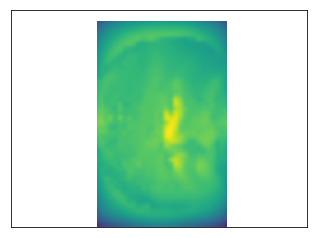

In [185]:
plt.imshow(np.log10(intens[:,:,2]),interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [22]:
def lognorm(x):
    v = np.log10(np.maximum(x,1.0e-15))
    vmin = np.amin(v)
    v-=vmin
    vmax = np.amax(v)
    v/=vmax
    return v

In [187]:
norms=lognorm(norms)

In [202]:
for j in range(0,47):
    for k in range(0,64):
        colors[j,k,:] = colormatch.xyz2rgb(intens[j,k,0],intens[j,k,1],intens[j,k,2]*norms[j,k])
cmax=0.1*np.amax(colors)
colors/=cmax

([], <a list of 0 Text yticklabel objects>)

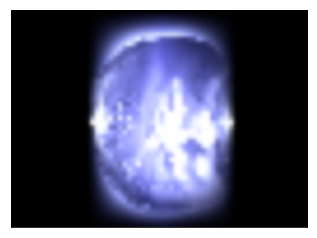

In [203]:
plt.imshow(np.minimum(colors,1.0),interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [141]:
mm2 = gsolnc.variables['map'][32,:,:,:]
intens2 = np.zeros((47,64,3))
colors2 = np.zeros((47,64,3))

wvl = gsolnc.variables['wvl'][:]*1000.0

In [142]:
wvl[0]

340.00015

In [143]:
clors=plt.cm.plasma(np.linspace(0,1,num=32))

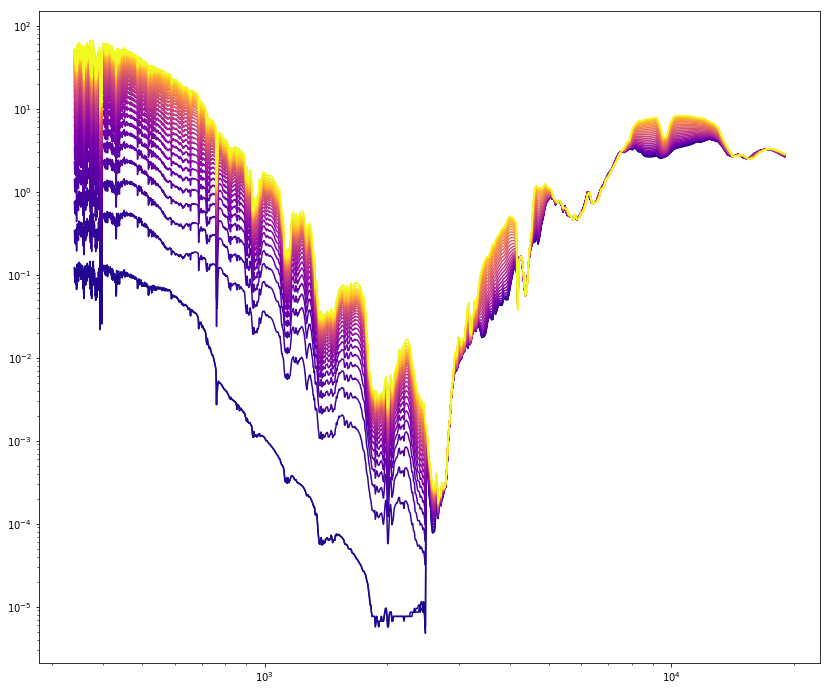

In [144]:
f,a=plt.subplots(figsize=(14,12))
for p in range(0,32):
    plt.plot(wvl,gsolnc.variables['spectra'][p,:],color=clors[p])
plt.xscale('log')
plt.yscale('log')

In [145]:
for j in range(0,47):
    for k in range(0,64):
        intens2[j,k,:] = colormatch.makexyz(wvl,mm2[j,k,:])
norms2 = intens2[:,:,2]/np.amax(intens2[:,:,2])

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


([], <a list of 0 Text yticklabel objects>)

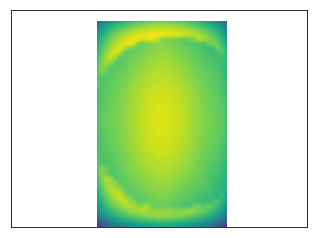

In [146]:
plt.imshow(np.log10(intens2[:,:,2]),interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [171]:
norms2=lognorm(norms2)

In [178]:
for j in range(0,47):
    for k in range(0,64):
        colors2[j,k,:] = colormatch.xyz2rgb(intens2[j,k,0],intens2[j,k,1],intens2[j,k,2]*norms2[j,k])
cmax=0.55*np.amax(colors2)
colors2/=cmax

([], <a list of 0 Text yticklabel objects>)

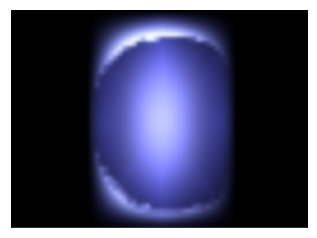

In [179]:
plt.imshow(np.minimum(colors2,1.0),interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [23]:
mm3 = planet.variables['map'][32,:,:,:]
intens3 = np.zeros((47,64,3))
colors3 = np.zeros((47,64,3))

wvl = planet.variables['wvl'][:]*1000.0

In [24]:
wvl[0]

340.00015

In [25]:
clors=plt.cm.plasma(np.linspace(0,1,num=32))

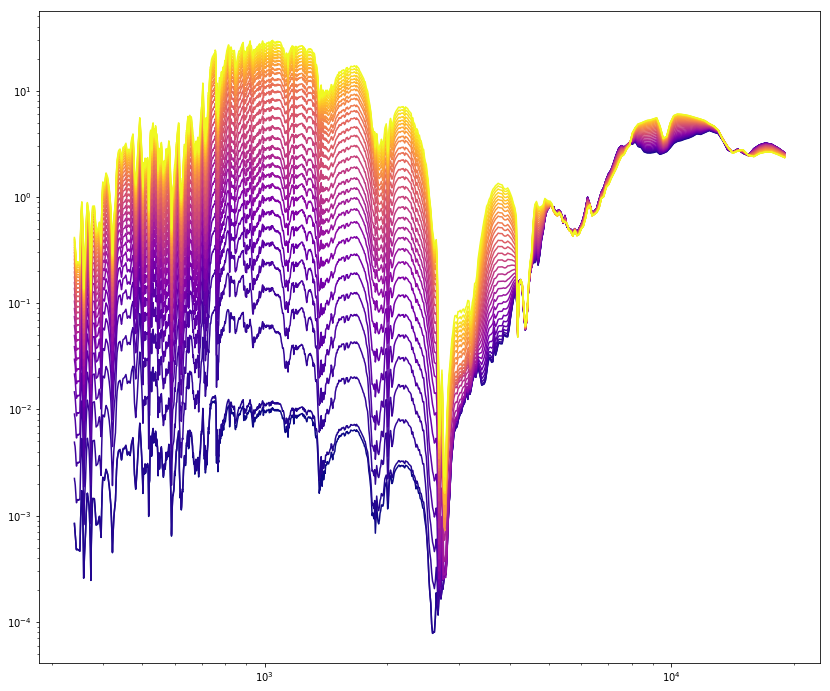

In [26]:
f,a=plt.subplots(figsize=(14,12))
for p in range(0,32):
    plt.plot(wvl,planet.variables['spectra'][p,:],color=clors[p])
plt.xscale('log')
plt.yscale('log')

In [27]:
for j in range(0,47):
    for k in range(0,64):
        intens3[j,k,:] = colormatch.makexyz(wvl,mm3[j,k,:])
norms3 = intens3[:,:,2]/np.amax(intens3[:,:,2])


In [28]:
norms3=lognorm(norms3)

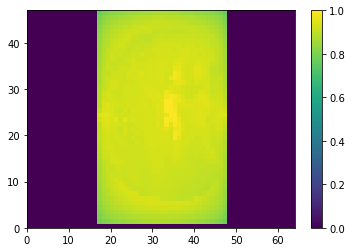

In [29]:
a=plt.pcolormesh(norms3)
plt.colorbar(a)

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


([], <a list of 0 Text yticklabel objects>)

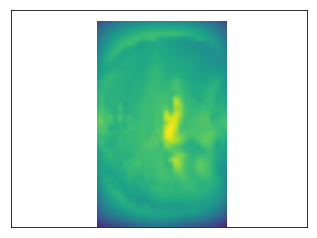

In [30]:
plt.imshow(np.log10(intens3[:,:,2])*norms3,interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [192]:
for j in range(0,47):
    for k in range(0,64):
        colors3[j,k,:] = colormatch.xyz2rgb(intens3[j,k,0],intens3[j,k,1],intens3[j,k,2]*norms3[j,k])
cmax=np.amax(colors3)
print np.mean(colors3)/cmax
colors3/=(cmax*5.0*np.mean(colors3/cmax))

0.03658848259936727


In [193]:
colors3.shape

(47, 64, 3)

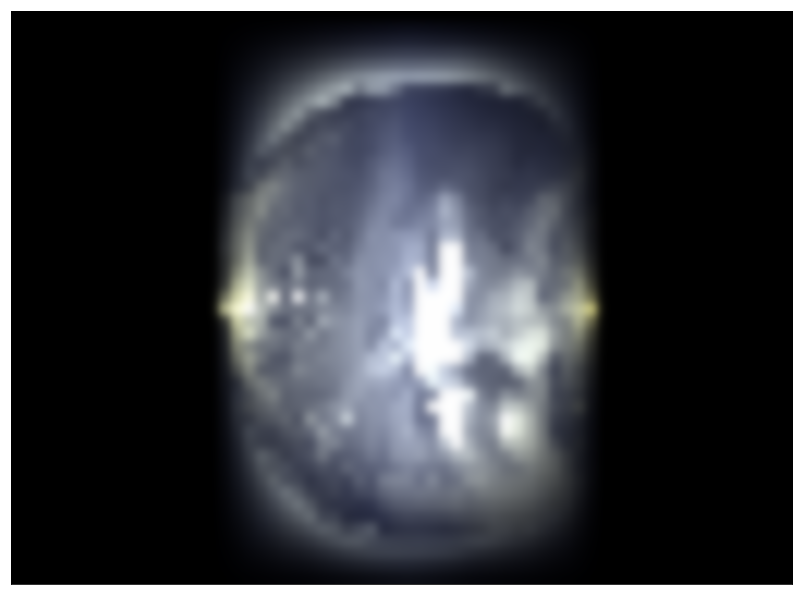

In [194]:
f,a=plt.subplots(figsize=(14,12))
plt.imshow(np.minimum(colors3,1.0),interpolation='gaussian')
plt.xticks([])
plt.yticks([])
plt.savefig("proxtruecolor.png",bbox_inches='tight')

In [179]:
tmp = nc.Dataset("lmdz_c1.0mspec_spectra.nc","r")
for k in tmp.variables:
    print k

lat
lon
azm
zen
wvl
spectra


In [180]:
lt = tmp.variables['lat'][:]
ln = tmp.variables['lon'][:]

In [181]:
lon,lat = np.meshgrid(ln,lt)

In [182]:
print lt
print ln

[ 86.25001    82.499985   78.74999    75.         71.25       67.50001
  63.75       60.000008   56.25       52.499992   48.75       44.999996
  41.250004   37.5        33.750004   30.         26.249994   22.499994
  18.749996   15.000003   11.250004    7.499998    3.749999    0.
  -3.7500057  -7.499998  -11.249997  -14.999996  -18.750002  -22.500002
 -26.250002  -30.        -33.750004  -37.5       -41.25      -45.
 -48.75      -52.5       -56.25      -60.        -63.75      -67.5
 -71.25      -75.        -78.75      -82.5       -86.25     ]
[-180.       -174.375    -168.75     -163.12498  -157.5      -151.875
 -146.25     -140.625    -135.       -129.37502  -123.74999  -118.125
 -112.5      -106.875    -101.25      -95.625     -90.        -84.375
  -78.75      -73.125     -67.5       -61.874996  -56.249996  -50.625004
  -45.000004  -39.375     -33.75      -28.124998  -22.499994  -16.875008
  -11.250004   -5.625002    0.          5.625002   11.250004   16.875008
   22.499994   28.12499

In [183]:
def orthographic(lon,lat,imap,l0=0,p0=0,ny=36,nx=36,interp='bilinear'):
    xymap = np.zeros((ny,nx,3))
    xymap[:] = 0.0
    coords = np.zeros((ny,nx,2))
    coords2 = np.zeros((ny,nx,2,3))
    coords3 = np.zeros((ny,nx,2))
    rad=0.5*(8*nx/18.0+8*ny/18.0)
    p0 *= np.pi/180.0
    l0 *= np.pi/180.0
    xx = np.arange(nx)-nx/2
    yy = np.arange(ny)-ny/2
    for j in range(0,ny):
        jy = yy[j]
        for i in range(0,nx):
            ix = xx[i]
            if (ix**2+jy**2)<=rad**2:
                rho = np.sqrt(ix**2+jy**2)
                cc = np.arcsin(rho/rad)
                if rho==0:
                    phi = 0.
                    lamb = l0
                else:
                    phi = np.arcsin(np.cos(cc)*np.sin(p0) + jy*np.sin(cc)*np.cos(p0)/rho)
                    lamb = l0 + np.arctan2(ix*np.sin(cc),(rho*np.cos(cc)*np.cos(p0)-jy*np.sin(cc)*np.sin(p0)))
                phi *= 180.0/np.pi
                lamb *= 180.0/np.pi
                if lamb<-180:
                    lamb += 360
                if lamb>180:
                    lamb -= 360
                jlat = np.argmin(abs(phi-lat))
                jlon = np.argmin(abs(lamb-lon))
                if interp=="bilinear":
                    jlat1 = np.where(lat<phi)[0]
                    jlat2 = np.where(lat>=phi)[0]
                    jlon1 = np.where(lon<lamb)[0]
                    jlon2 = np.where(lon>=lamb)[0]
                    if len(jlat1)>0 and len(jlat2)>0 and len(jlon1)>0 and len(jlon2)>0:
                        jlat1 = jlat1[0]
                        jlat2 = jlat2[-1]
                        jlon1 = jlon1[-1]
                        jlon2 = jlon2[0]
                        p1 = lat[jlat1]
                        p2 = lat[jlat2]
                        l1 = lon[jlon1]
                        l2 = lon[jlon2]
                        dl = l2-l1
                        dp = p2-p1
                        if dl==0 and dp>0:
                            fxy1 = imap[jlat1,jlon,:]
                            fxy2 = imap[jlat2,jlon,:]
                            xymap[j,i,:] = (p2-phi)/dp*fxy1 + (phi-p1)/dp*fxy2
                        elif dp==0 and dl>0:
                            fx1y = imap[jlat,jlon1,:]
                            fx2y = imap[jlat,jlon2,:]
                            xymap[j,i,:] = (l2-lamb)/dl*fx1y + (lamb-l1)/dl*fx2y
                        elif dp==0 and dl==0:
                            xymap[j,i,:] = imap[jlat,jlon,:]
                        else:
                            fxy1 = (l2-lamb)/dl*imap[jlat1,jlon1,:] + (lamb-l1)/dl*imap[jlat1,jlon2,:]
                            fxy2 = (l2-lamb)/dl*imap[jlat2,jlon1,:] + (lamb-l1)/dl*imap[jlat2,jlon2,:]
                            xymap[j,i,:] = (p2-phi)/dp*fxy1 + (phi-p1)/dp*fxy2
                    else:
                        jlat1=-200
                        jlat2=-200
                        xymap[j,i,:] = imap[jlat,jlon,:]
                else:
                    xymap[j,i,:] = imap[jlat,jlon,:]
                    
    return xymap

In [199]:
proj= orthographic(ln,lt,np.minimum(colors3,1.0),l0=0.0,nx=200,ny=200)

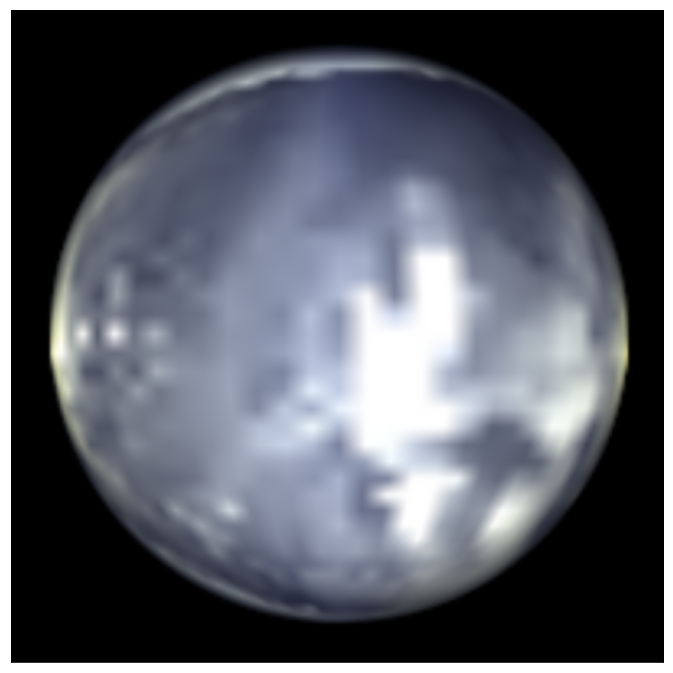

In [200]:
f,a=plt.subplots(figsize=(14,12))
plt.imshow(proj,interpolation='gaussian',origin='lower')
plt.xticks([])
plt.yticks([])
plt.savefig("proxtruecolor.png",bbox_inches='tight')

In [131]:
mm4 = planetnc.variables['map'][32,:,:,:]
intens4 = np.zeros((47,64,3))
colors4 = np.zeros((47,64,3))

wvl = planet.variables['wvl'][:]*1000.0

In [132]:
wvl[0]

340.00015

In [133]:
clors=plt.cm.plasma(np.linspace(0,1,num=32))

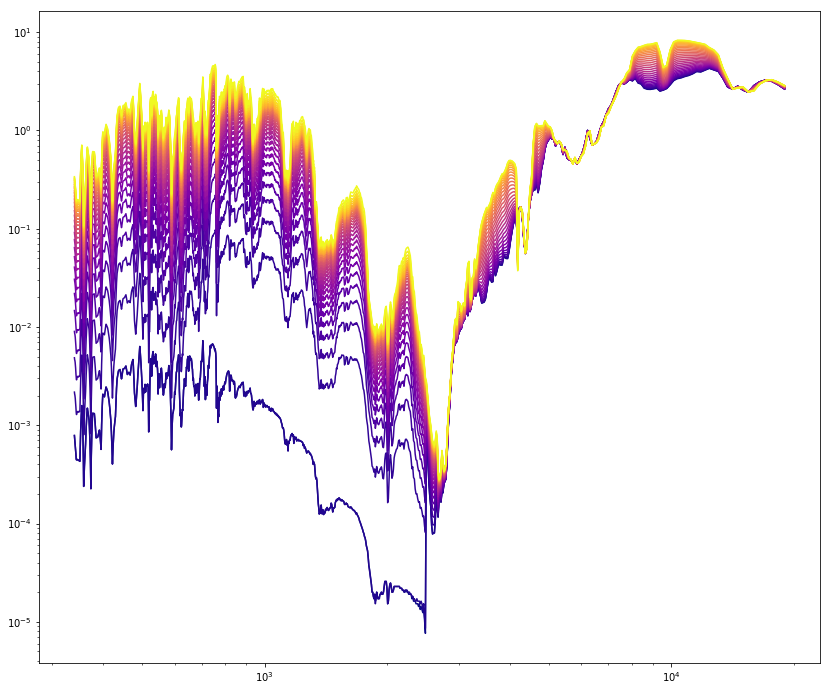

In [134]:
f,a=plt.subplots(figsize=(14,12))
for p in range(0,32):
    plt.plot(wvl,planetnc.variables['spectra'][p,:],color=clors[p])
plt.xscale('log')
plt.yscale('log')

In [135]:
for j in range(0,47):
    for k in range(0,64):
        intens4[j,k,:] = colormatch.makexyz(wvl,mm4[j,k,:])
norms4 = intens4[:,:,2]/np.amax(intens4[:,:,2])


In [136]:
norms4=lognorm(norms4)

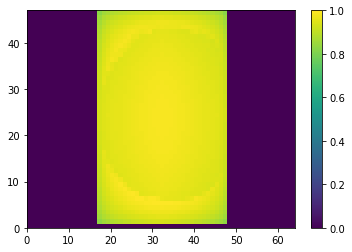

In [137]:
a=plt.pcolormesh(norms4)
plt.colorbar(a)

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


([], <a list of 0 Text yticklabel objects>)

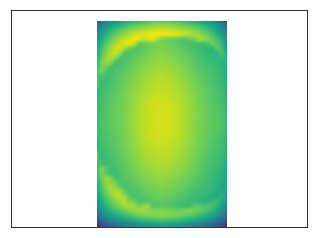

In [138]:
plt.imshow(np.log10(intens4[:,:,2])*norms4,interpolation='gaussian')
plt.xticks([])
plt.yticks([])

In [195]:
for j in range(0,47):
    for k in range(0,64):
        colors4[j,k,:] = colormatch.xyz2rgb(intens4[j,k,0],intens4[j,k,1],intens4[j,k,2]*norms4[j,k])
cmax=1.0*np.amax(colors4)
colors4/=(cmax*5.0*np.mean(colors4/cmax))

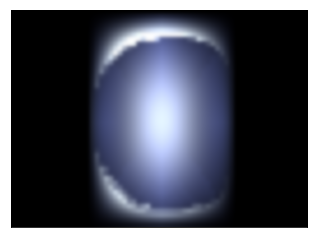

In [196]:
plt.imshow(np.minimum(colors4,1.0),interpolation='gaussian')
plt.xticks([])
plt.yticks([])
plt.savefig("proxnctruecolor.png",bbox_inches='tight')

In [197]:
proj= orthographic(ln,lt,np.minimum(colors4,1.0),l0=0.0,nx=200,ny=200)

([], <a list of 0 Text yticklabel objects>)

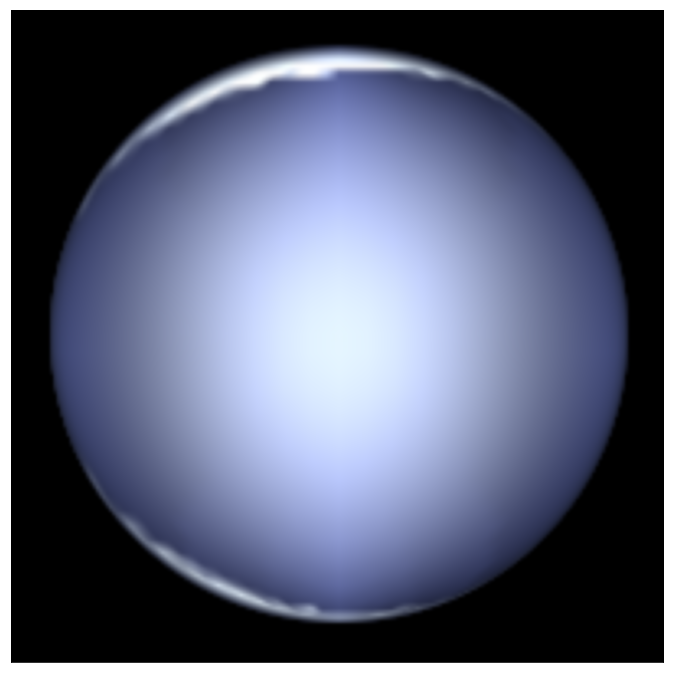

In [198]:
f,a=plt.subplots(figsize=(14,12))
plt.imshow(proj,interpolation='gaussian',origin='lower')
plt.xticks([])
plt.yticks([])